In [45]:
import random
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import torch

from src.model.activation import LeakyRelu, Linear
from src.model.base import NeuralNetwork
from src.model.layer import FullyConnected, Input
from src.model.loss import CategoricalCrossEntropy
from src.model.metric import AccuracyOneHot
from src.model.optimizer import Adam

## Helper functions for displaying changes in loss and Accuracy with the change of epochs

In [46]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_accuracy_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# 1. Classification on full iris dataset

## Function to display selected iris sample data with species shown on the sepal width - sepal height and petal width - petal height coordinates

In [47]:
def plot_iris(data, title):

    sepal_length, sepal_width, petal_length, petal_width, colors = [], [], [], [], []

    for row in data:
        sepal_length.append(row['input'][0])
        sepal_width.append(row['input'][1])
        petal_length.append(row['input'][2])
        petal_width.append(row['input'][3])
        if row['output'] == [1.0, 0.0, 0.0]:
            color = 'red'
        elif row['output'] == [0.0, 1.0, 0.0]:
            color = 'blue'
        else:
            color = 'orange'
        colors.append(color)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.scatter(sepal_length, sepal_width, c=colors, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label='Iris-setosa')
    blue_patch = mpatches.Patch(color='blue', label='Iris-versicolor')
    orange_patch = mpatches.Patch(color='orange', label='Iris-virginica')
    ax1.legend(handles=[red_patch, blue_patch, orange_patch], title="Species")
    ax1.set_title(f"{title} in sepal coordinates")
    ax1.set_xlabel("sepal_length")
    ax1.set_ylabel("sepal_width")

    ax2.scatter(petal_length, petal_width, c=colors, alpha=0.5)
    ax2.legend(handles=[red_patch, blue_patch, orange_patch], title="Species")
    ax2.set_title(f"{title} in petal coordinates")
    ax2.set_xlabel("petal_length")
    ax2.set_ylabel("petal_width")

    plt.tight_layout()
    plt.show()

    return

## Function to obtain an iris dataset

In [48]:
def get_iris_dataset():
    data = pd.read_csv('../data/iris/Iris.csv')
    data.drop('Id', axis=1, inplace=True)
    feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    for feature_column in feature_columns:
        data[feature_column] = (data[feature_column] - data[feature_column].min())/(data[feature_column].max() - data[feature_column].min())

    one_hot_map = {
        'Iris-setosa': [1.0, 0.0, 0.0],
        'Iris-versicolor': [0.0, 1.0, 0.0],
        'Iris-virginica': [0.0, 0.0, 1.0],
    }

    dataset = []
    for index in data.index:
        input_values = [float(val) for val in data.loc[index].drop('Species').values]
        specie = one_hot_map[data.loc[index, 'Species']]
        dataset.append({
            'input': input_values,
            'output': specie
        })

    random.shuffle(dataset)
    return dataset[:115], dataset[115:]

## Create model for classification on iris dataset and test

previous_layer_size
4
self.__device__fc
cpu
previous_layer_size
128
self.__device__fc
cpu
previous_layer_size
128
self.__device__fc
cpu
previous_layer_size
128
self.__device__fc
cpu
self.__device
cpu
len(test_dataset)
35
Epoch: 1/30, train loss: 0.8849, train Accuracy: 0.6522, test loss: 0.8566, test Accuracy: 0.7143
Epoch time:  0.10962796211242676
Epoch: 2/30, train loss: 0.7651, train Accuracy: 0.8435, test loss: 0.7522, test Accuracy: 0.8286
Epoch time:  0.10695815086364746
Epoch: 3/30, train loss: 0.6975, train Accuracy: 0.887, test loss: 0.6469, test Accuracy: 0.9714
Epoch time:  0.11892223358154297
Epoch: 4/30, train loss: 0.6269, train Accuracy: 0.9217, test loss: 0.6244, test Accuracy: 1.0
Epoch time:  0.10838437080383301
Epoch: 5/30, train loss: 0.6235, train Accuracy: 0.9391, test loss: 0.6501, test Accuracy: 0.9143
Epoch time:  0.1321868896484375
Epoch: 6/30, train loss: 0.6034, train Accuracy: 0.9565, test loss: 0.629, test Accuracy: 0.9429
Epoch time:  0.10701513290405273

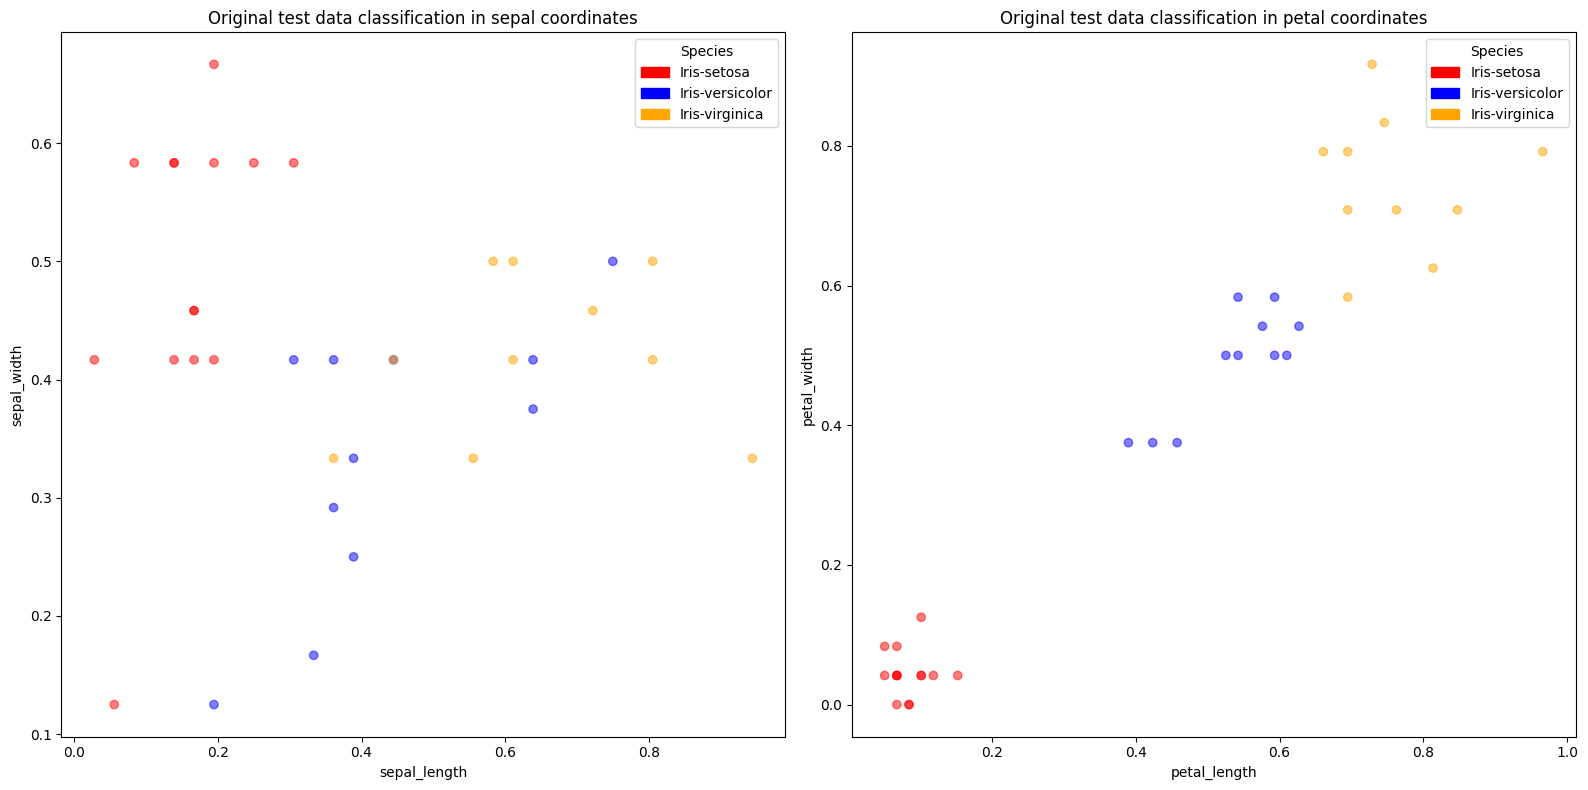

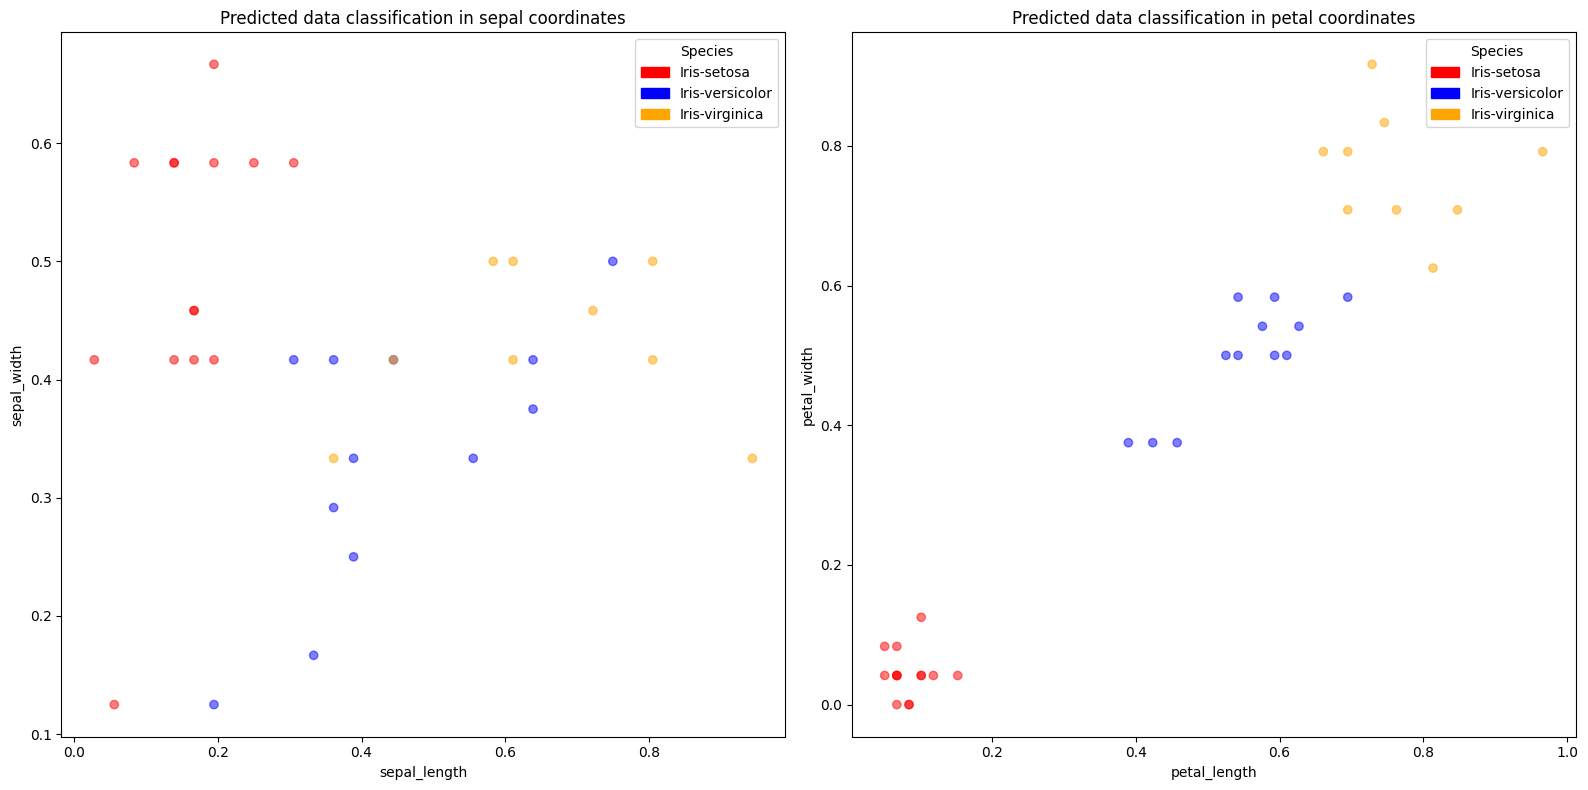

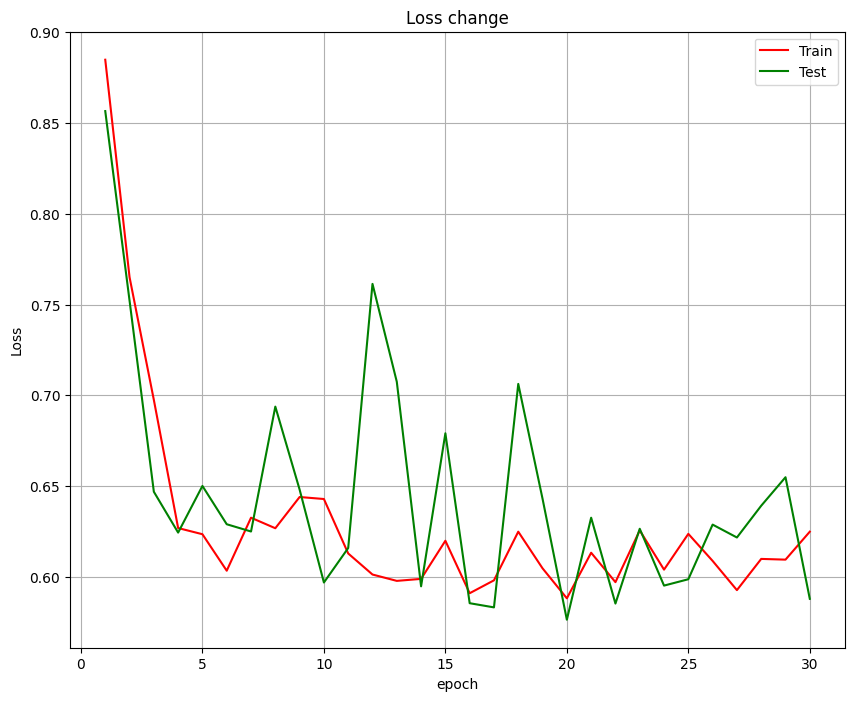

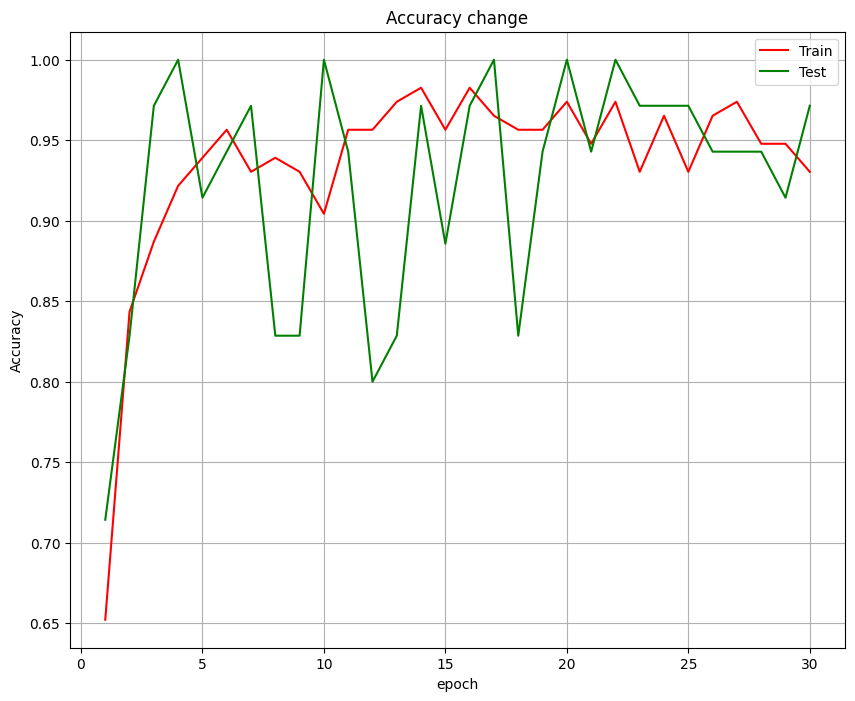

In [49]:
train_dataset, test_dataset = get_iris_dataset()

start_time = time.time()

layers = [
    FullyConnected(128, LeakyRelu()),
    FullyConnected(128, LeakyRelu()),
    FullyConnected(128, LeakyRelu()),
    FullyConnected(3, Linear())
]
nn = NeuralNetwork(
    Input(4),
    layers,
    optimizer=Adam(),
    loss=CategoricalCrossEntropy(),
    metric=AccuracyOneHot(),
    convert_prediction='argmax'
)

epochs = 30
history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

prediction, raw_pred = nn.predict(test_dataset, with_raw_prediction=True)

predicted = test_dataset.copy()

predicted = []
for index, predict in enumerate(prediction):
    predicted.append({
        'input': test_dataset[index]['input'],
        'output': predict.flatten().tolist()
    })

plot_iris(test_dataset, 'Original test data classification')
plot_iris(predicted, 'Predicted data classification')

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

plot_loss(epoch, train_loss, test_loss, "Loss change")
plot_accuracy_score(epoch, train_metric, test_metric, "Accuracy change")

# 2. Classification on digits dataset

## Function to display selected 

In [50]:
def plot_digit(image, digit):
    image = torch.tensor(image).numpy().reshape(28, 28)
    plt.figure()
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted digit: {digit}")
    plt.axis("off")
    plt.show()

    return

## Helper function to get one-hot array for digit

In [51]:
def get_onehot_digit(digit):
    output = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return output[-digit:] + output[:-digit]

## Helper function to get digit by one-hot arrary

In [52]:
def get_digit(onehot_array):
    for index, value in enumerate(onehot_array):
        if value == 1.0:
            return index
    return None

## Function to get digits train/test data

In [53]:
def get_digits_data():

    train_dataset = []

    train = pd.read_csv("../data/digits/train.csv", header=0, nrows=5000)

    for index in train.index:
        input_values = [
            float(val) / 255.0 for val in train.loc[index].drop("label").values
        ]
        train_dataset.append(
            {
                "input": input_values,
                "output": get_onehot_digit(int(train.loc[index]["label"])),
            }
        )

    random.seed(1)
    random.shuffle(train_dataset)
    return train_dataset[:2000], train_dataset[2000:2500]

## Create model for classification on digits dataset and test

previous_layer_size
784
self.__device__fc
cpu
previous_layer_size
256
self.__device__fc
cpu
previous_layer_size
128
self.__device__fc
cpu
previous_layer_size
64
self.__device__fc
cpu
self.__device
cpu
len(test_dataset)
500
Epoch: 1/200, train loss: 2.091, train Accuracy: 0.6025, test loss: 1.8443, test Accuracy: 0.854
Epoch time:  1.380044937133789
Epoch: 2/200, train loss: 1.8053, train Accuracy: 0.866, test loss: 1.7165, test Accuracy: 0.902
Epoch time:  1.3881442546844482
Epoch: 3/200, train loss: 1.7179, train Accuracy: 0.912, test loss: 1.6781, test Accuracy: 0.928
Epoch time:  1.3813226222991943
Epoch: 4/200, train loss: 1.6702, train Accuracy: 0.936, test loss: 1.6461, test Accuracy: 0.938
Epoch time:  1.3772435188293457
Epoch: 5/200, train loss: 1.6367, train Accuracy: 0.953, test loss: 1.6225, test Accuracy: 0.942
Epoch time:  1.3191030025482178
Epoch: 6/200, train loss: 1.6091, train Accuracy: 0.966, test loss: 1.6179, test Accuracy: 0.942
Epoch time:  1.4234158992767334
Epoc

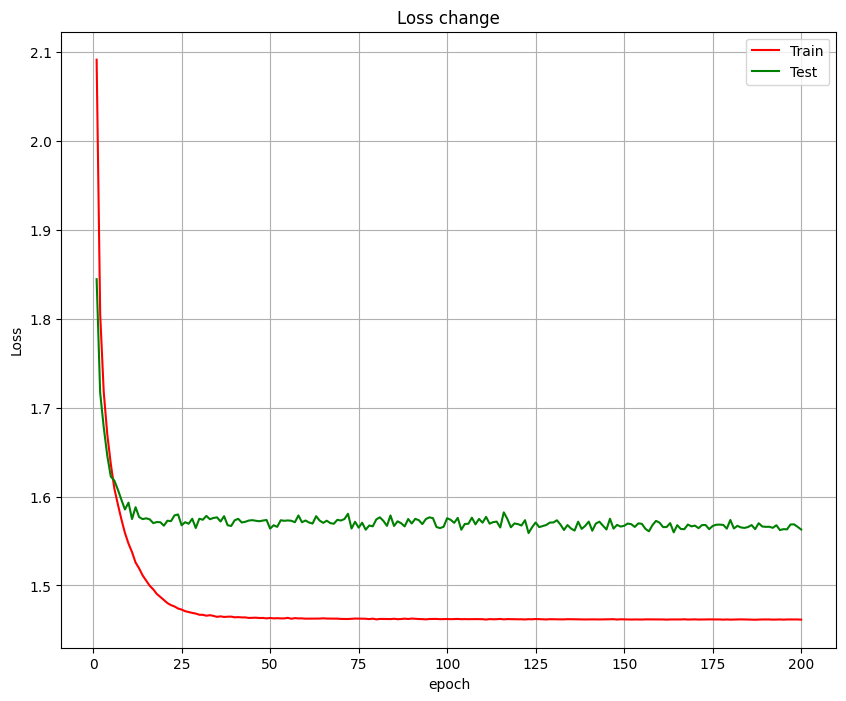

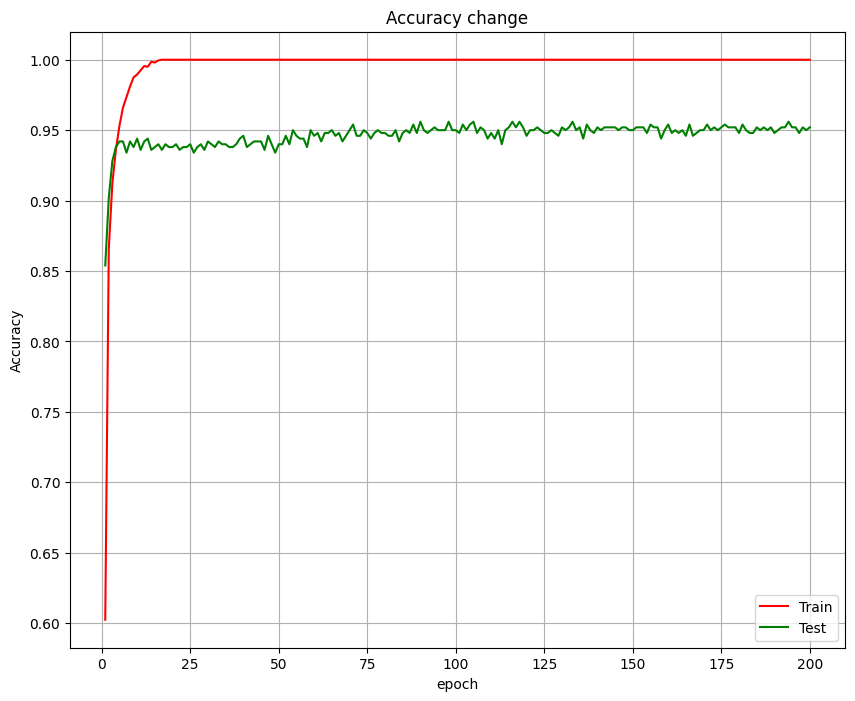

In [54]:
train_dataset, test_dataset = get_digits_data()

layers = [
    FullyConnected(256, LeakyRelu()),
    FullyConnected(128, LeakyRelu()),
    FullyConnected(64, LeakyRelu()),
    FullyConnected(10, Linear()),
]
nn = NeuralNetwork(
    Input(784),
    layers,
    optimizer=Adam(),
    loss=CategoricalCrossEntropy(),
    metric=AccuracyOneHot(),
    convert_prediction="argmax",
)

start_time = time.time()

epochs = 20
history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=8, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

prediction = nn.predict(test_dataset)

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

plot_loss(epoch, train_loss, test_loss, "Loss change")
plot_accuracy_score(epoch, train_metric, test_metric, "Accuracy change")

## First ten test digits with predicted values

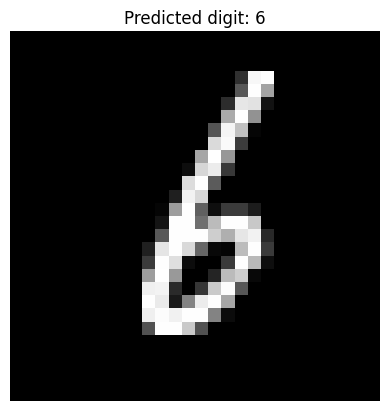

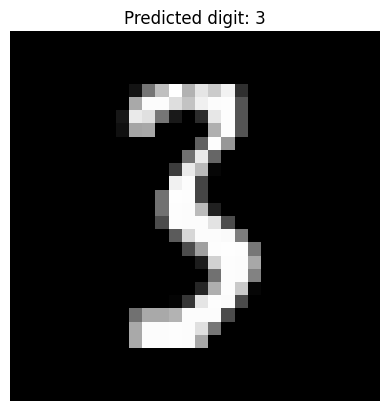

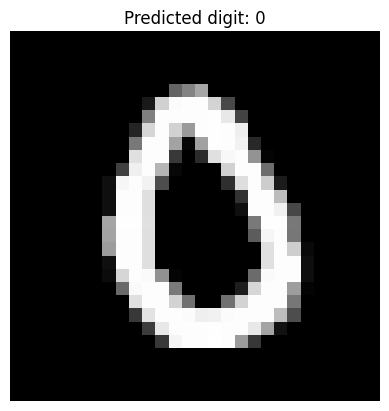

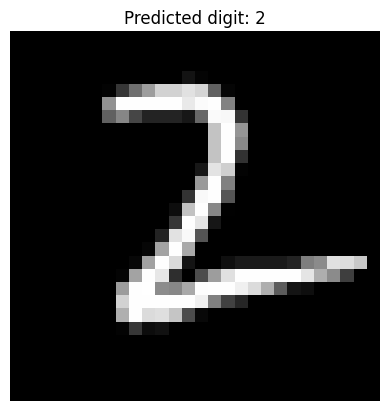

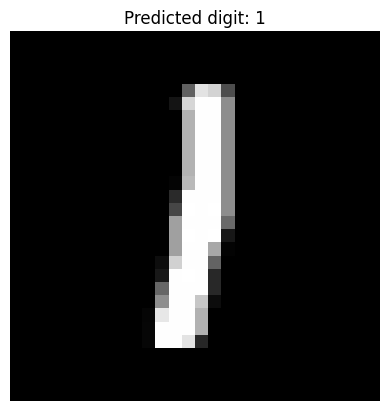

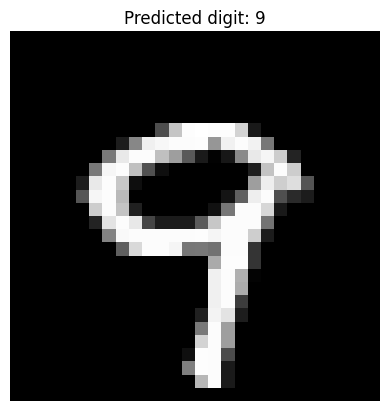

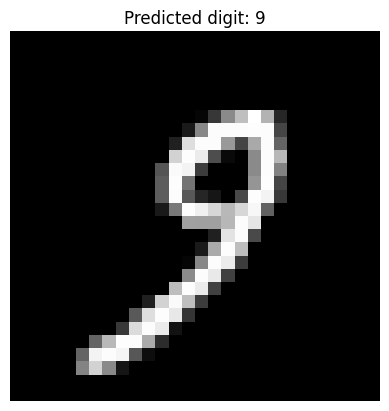

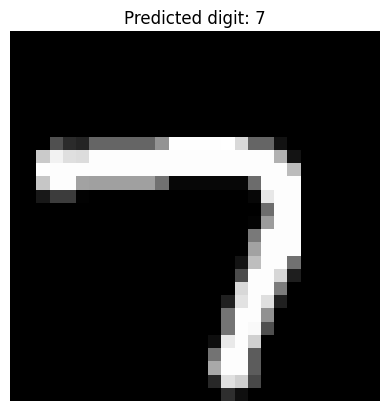

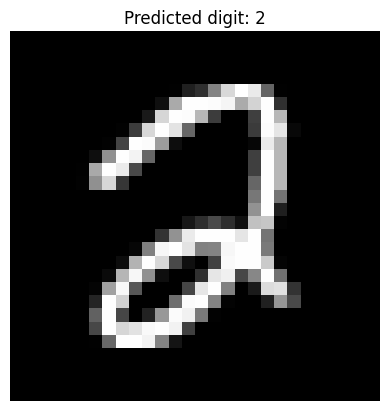

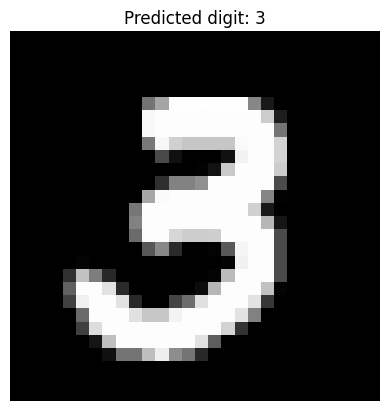

In [55]:
for index, predicted_digit in enumerate(prediction[:10]):
    plot_digit(test_dataset[index]['input'], get_digit(predicted_digit))